![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)
# **Face and Eye Detection with Haar Cascade Classifiers**

####**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab


In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

--2023-05-22 10:20:22--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.4MB/s    in 1.5s    

2023-05-22 10:20:24 (18.4 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2023-05-22 10:20:24--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.10|:443... connected.
HTTP r

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()


## **Simple Face Detection using Haarcascade Classifiers**

### **Firstly, What is Object Detection?**

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area. 

## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)



<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-0fa0ad07422b>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


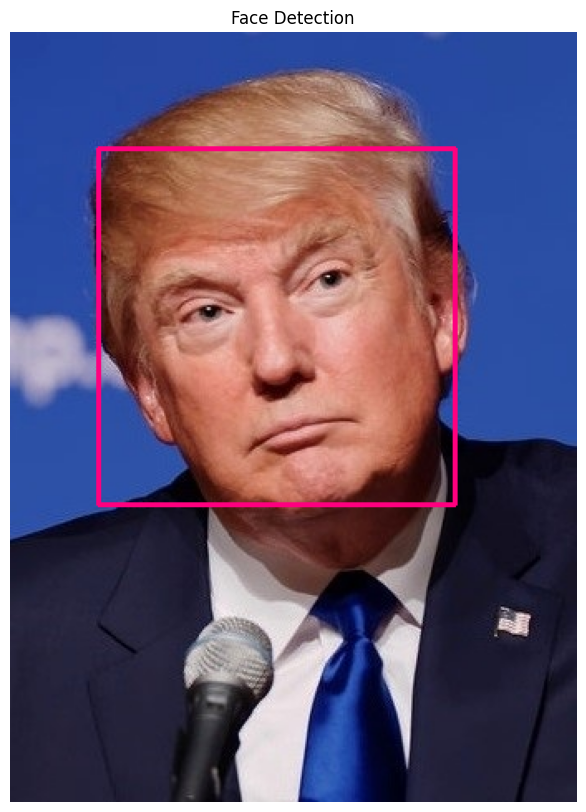

In [3]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

if faces is ():
    print("No faces found")


for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-8e7bef4ff4cb>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


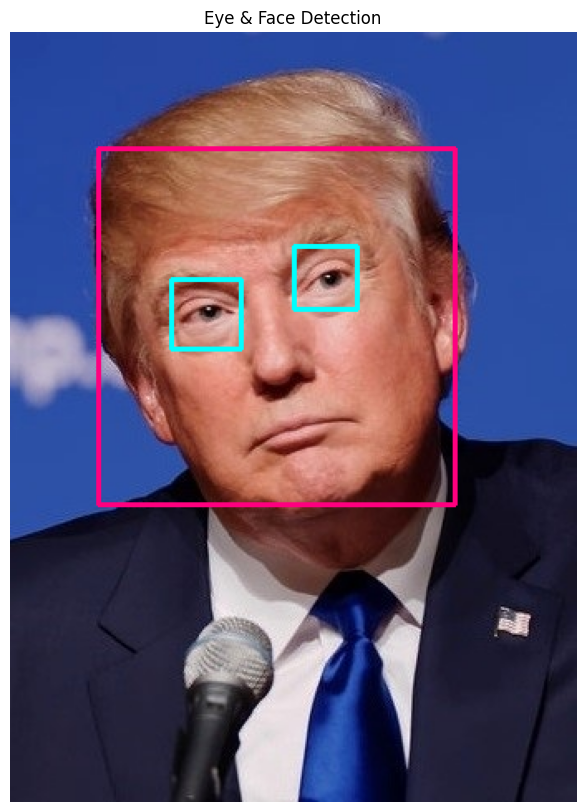

In [4]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)